In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


In [9]:
GDpath = "Worlds_Best_Employers_GD.csv"
WLBpath="Work-Life-Balance-2022.csv"

employers_df=pd.read_csv(GDpath, encoding = "ISO-8859-1")
WLB_df=pd.read_csv(WLBpath, encoding = "ISO-8859-1")

employers_df=employers_df.rename(columns={"HQ_CITY":"City","COUNTRY/TERRITORY":"Country","GLASSDOOR_OVERALL_RATING":"Glassdoor Rating"})
employers_df
employers_df.to_csv('employers_df.csv',index=False, header = True)

employers_df.head(24)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,"80,000",4.2,Atlanta
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,"288,000",4.0,Issaquah
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,"25,988",4.4,San Jose
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,"55,093",4.4,Dallas
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000",4.3,Round Rock


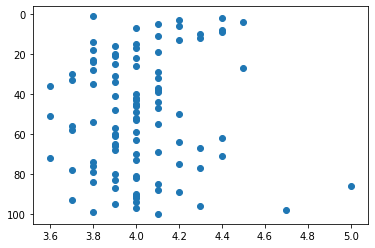

In [6]:
plt.scatter(employers_df['Glassdoor Rating'],employers_df['RANK'])
plt.gca().invert_yaxis()
plt.show()

In [18]:
WLB_df.head()

,2022,2021,City,Country,Remote Jobs,Overworked Population,Minimum Vacations Offered (Days),Vacations Taken (Days),Unemployment,Multiple Jobholders,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
0,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [58]:
employers_places_df=pd.merge(employers_df, WLB_df, on="City",how="inner")
employers_places_cleaned=employers_places_df[['RANK','NAME','TICKER','Country_x','EMPLOYEES','Glassdoor Rating','City','TOTAL SCORE']]
employers_places_cleaned=employers_places_cleaned.rename(columns={"Country_x":"Country","TOTAL SCORE":"Work-Life balance score"})
employers_places_cleaned.head(12)

,RANK,NAME,TICKER,Country,EMPLOYEES,Glassdoor Rating,City,Work-Life balance score
0,6,Delta Air Lines,DAL,United States,"80,000",4.2,Atlanta,84.06
1,32,Coca-Cola,KO,United States,"79,000",4.1,Atlanta,84.06
2,52,The Home Depot,HD,United States,"30,000",4.0,Atlanta,84.06
3,9,Southwest Airlines,LUV,United States,"55,093",4.4,Dallas,81.74
4,13,BMW Group,BMW,Germany,"118,909",4.2,Munich,93.65
5,19,Fraunhofer Society,none,Germany,"30,028",4.1,Munich,93.65
6,38,Siemens,SIEGY,Germany,"303,000",4.1,Munich,93.65
7,60,MTU Aero Engines,MTX,Germany,"10,000",3.9,Munich,93.65
8,70,Wacker Chemie,WCH,Germany,"14,400",4.0,Munich,93.65
9,14,Amazon,AMZN,United States,"1,608,000",3.8,Seattle,88.38


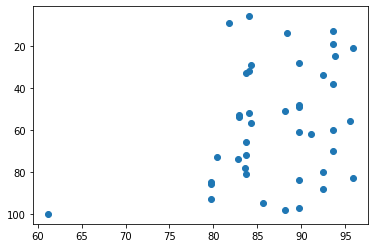

In [57]:
plt.scatter(employers_places_cleaned['Work-Life balance score'],employers_places_cleaned['RANK'])
plt.gca().invert_yaxis()